## Project: Non-profit organization networking
Module 19 Aim: To use neural networks and deep learning models (both supervised machine learning type of algorithms) to determine which charities should be supported and which are fradulent (similar to the loan report module).

# Background Research

## 19.1.1 Neural Network (Artificial Neural Networks, ANN)

Key Points: 

1. ANNs are a set of algorithms that are modeled after the human brain; they are an advanced form of machine learning that recognizes patterns and features in input data and provides a clear quantitative output.


2. The simplest form of a neural network is the layer of neurons - each of these neurons perform individual computations.


3. The computations are connected and weighted against one another, until the neurons reach the final layer, which returns a numerical result or an encoded categorical result. 


4. Difference between a numerical and categorical result: a numerical result is a predicted measurement (int, number value); a categorical result is a label (words) - it predicts which group the input will come from. 

### Ways to use a neural network model

1. Create a claffication algorithm - determines if an input belongs in one category vs another. Behaves similarly to a regression model where the dependent output variable predicted independent input variables.


2. Can be an alternative to random forest, logistic regression, or linear regression models. 

### Advantages of neural network model:

1. More effective at detecting complex, nonlinear relationships.


2. Have greater tolerance for messy data and can learn to ignore noisy characteristics in data.

### Disadvantages of neural network models:

1. Layers of neurons are often too complex to dissect and understand (creating a black box problem)


2. Neural networks are prone to overfitting (characterizing the training data so well that it does not effectively generalize to test data.)

### Real life uses of neural networks:
   1) Finance: used to detect fraud and trends in the stock market; 
    
   2) Company profit via marketing: Amazon and Apple use neural networks to classify their consumers to provide targeted marketing as well as behavior training for robotic control systems. 

## 19.1.2 Perceptron, the Computational Neuron

Key points:

1. Computational neurons come from the field of artificial intelligence of the 1950s - the peceptron, was the machine for training the first neural network.


2. The peceptron model is a single neural network unit; it mimics a biological neuron by receiving input data, weighing the information, and producing a clear output. 


#### 3. Four major components of a perceptron model:
    
    A. Input values (labelled x or X (chi))
    
    B. Weight coefficient for each input value w or w (omega)
    
    C. Bias - a constant value added to the input to influence the final decision, labelled as w0. 
    
    D. Net summary function - aggregates all weighted inputs, as a weighted summation. 

#### 4. Most common use of a perceptron model:  

1. Perceptrons are most commonly usd to separate data into two groups (also known as linear binary classifier) - i.e. algorithm works to classify two groups that can be separated by a linear equation (linearly separable).

-Activation function: mathematical function applied to the end of each "neuron" that transforms the output to a quantitative value.

### Import Dependencies

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/f

### Generate datset and graph data

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [3]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [1 0 0 1 1 1 0 0 0 1]
Data: [[ 5.47809781  7.20371391]
 [-8.42848273  4.12188879]
 [-7.90544691  3.32363913]
 [ 6.41104118  5.52301297]
 [ 7.28859947  6.17122597]
 [ 5.28143957  5.18320278]
 [-6.82218763  4.29768887]
 [-9.75313748  4.71087077]
 [-9.64510084  3.00151179]
 [ 5.46592633  7.14051271]]


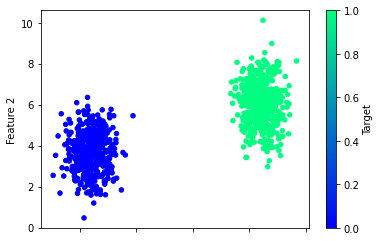

In [4]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

### Split Data into Testing and Training

In [5]:
# Split dataset into testing and training sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Normalize dataset 

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

In [7]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create neural network model: Sequential mode

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 290us/sample - loss: 0.6581 - acc: 0.9773
Epoch 2/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6505 - acc: 1.0000
Epoch 3/100
750/750 [==============================] - 0s 42us/sample - loss: 0.6419 - acc: 1.0000
Epoch 4/100
750/750 [==============================] - 0s 42us/sample - loss: 0.6325 - acc: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 49us/sample - loss: 0.6222 - acc: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 41us/sample - loss: 0.6113 - acc: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 41us/sample - loss: 0.5992 - acc: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5866 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 38us/sample - loss: 0.5734 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 53us/sample - loss: 0.5597 - acc: 1.0000
Epoch 11

### Visualize model's loss over 100 epochs

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

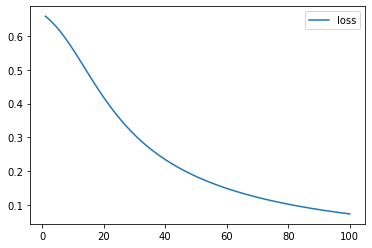

In [16]:
# Plot the loss
history_df.plot(y="loss")

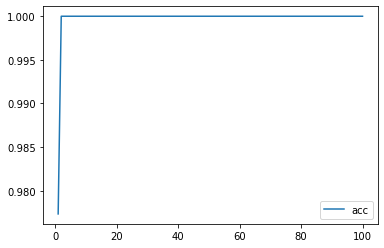

In [17]:
# Plot the accuracy
history_df.plot(y="acc")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0751 - acc: 1.0000
Loss: 0.07506556716561318, Accuracy: 1.0


### Predict new dataset 

In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

### Training models on non-linear data 

In [20]:
from sklearn.datasets import make_moons

In [21]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [22]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [23]:
# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

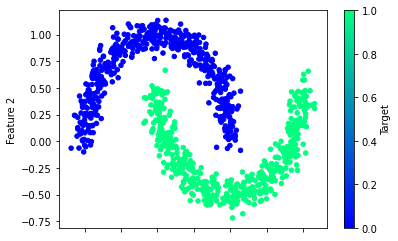

In [24]:
# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [25]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

In [26]:
# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

In [27]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [28]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [29]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 41us/sample - loss: 1.0495 - acc: 0.4760
Epoch 2/100
750/750 [==============================] - 0s 47us/sample - loss: 0.9383 - acc: 0.5067
Epoch 3/100
750/750 [==============================] - 0s 38us/sample - loss: 0.8634 - acc: 0.5187
Epoch 4/100
750/750 [==============================] - 0s 37us/sample - loss: 0.8085 - acc: 0.5307
Epoch 5/100
750/750 [==============================] - 0s 39us/sample - loss: 0.7666 - acc: 0.5360
Epoch 6/100
750/750 [==============================] - 0s 40us/sample - loss: 0.7327 - acc: 0.5493
Epoch 7/100
750/750 [==============================] - 0s 42us/sample - loss: 0.7039 - acc: 0.5600
Epoch 8/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6792 - acc: 0.5733
Epoch 9/100
750/750 [==============================] - 0s 38us/sample - loss: 0.6568 - acc: 0.5800
Epoch 10/100
750/750 [==============================] - 0s 37us/sample - loss: 0.6371 - acc: 0.5933
Epoch 11/

750/750 [==============================] - 0s 42us/sample - loss: 0.2799 - acc: 0.8747
Epoch 84/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2790 - acc: 0.8760
Epoch 85/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2780 - acc: 0.8773
Epoch 86/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2772 - acc: 0.8787
Epoch 87/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2763 - acc: 0.8787
Epoch 88/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2754 - acc: 0.8787
Epoch 89/100
750/750 [==============================] - 0s 37us/sample - loss: 0.2746 - acc: 0.8800
Epoch 90/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2737 - acc: 0.8800
Epoch 91/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2730 - acc: 0.8813
Epoch 92/100
750/750 [==============================] - 0s 38us/sample - loss: 0.2722 - acc: 0.8813
Epoch 93/100


In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))


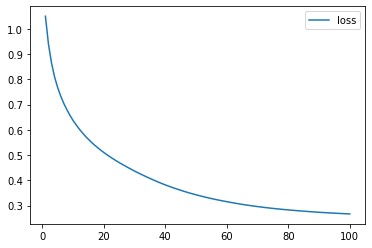

In [31]:
# Plot the loss
history_df.plot(y="loss")

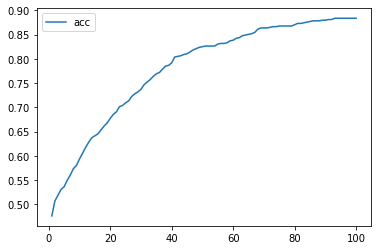

In [32]:
# Plot the loss
history_df.plot(y="acc")

### 19.2.5 Multiple-Neuron Neural Network - Sequential Model

### 1. Change the structure of the old Sequential neural network model

In [33]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

### 2. Use Dense class to add input, hidden, and output layers

In [34]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [35]:
# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

### 3. Compile and train model

In [36]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 152us/sample - loss: 0.7753 - acc: 0.3560
Epoch 2/100
750/750 [==============================] - 0s 38us/sample - loss: 0.7205 - acc: 0.4453
Epoch 3/100
750/750 [==============================] - 0s 42us/sample - loss: 0.6713 - acc: 0.5387
Epoch 4/100
750/750 [==============================] - 0s 49us/sample - loss: 0.6282 - acc: 0.6213
Epoch 5/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5901 - acc: 0.7067
Epoch 6/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5557 - acc: 0.7880
Epoch 7/100
750/750 [==============================] - 0s 38us/sample - loss: 0.5248 - acc: 0.8120
Epoch 8/100
750/750 [==============================] - 0s 47us/sample - loss: 0.4977 - acc: 0.8213
Epoch 9/100
750/750 [==============================] - 0s 54us/sample - loss: 0.4724 - acc: 0.8227
Epoch 10/100
750/750 [==============================] - 0s 48us/sample - loss: 0.4505 - acc: 0.8267
Epoch 11

750/750 [==============================] - 0s 55us/sample - loss: 0.2251 - acc: 0.9013
Epoch 84/100
750/750 [==============================] - 0s 62us/sample - loss: 0.2248 - acc: 0.9013
Epoch 85/100
750/750 [==============================] - 0s 52us/sample - loss: 0.2246 - acc: 0.9000
Epoch 86/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2244 - acc: 0.9000
Epoch 87/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2242 - acc: 0.9000
Epoch 88/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2239 - acc: 0.9000
Epoch 89/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2237 - acc: 0.9000
Epoch 90/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2234 - acc: 0.9000
Epoch 91/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2231 - acc: 0.8987
Epoch 92/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2229 - acc: 0.9013
Epoch 93/100


Note: as the number of neurons increased within the hidden layer (based on the training metrics of the new model), the classification accuracy improves. Accuracy was not yielded as perfect however (0.900 compared to 1.000 after 100 epochs). 

Summary: as input data becomes more complex, neural networks will require more and more optimization teaks to acheive their desired accuracy.

### 19.3.2 Categorical Variables
Note: one-hot encoding - pre-processes categorical variable into binary enoding; downside is that it is very memory intensive.

Therefore, categorical variables with a large number of unique values; process of reducing the number of unique categorical values in a dataset is known as bucketing or binning.   